In [114]:
#Importing the Important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
import joblib
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.optimize import linear_sum_assignment
import warnings
warnings.filterwarnings('ignore')

In [90]:
# Loading the data
df = pd.read_csv(r'C:\Users\GOOD\Finance_da.csv')
print("Data loaded successfully.\n")
df.head(10)

Data loaded successfully.



,Transaction_ID,Account_Balance,Transaction_Amount,Age_of_Account,Number_of_Transactions,Credit_Score,Annual_Income,Loan_Amount,Interest_Rate,Number_of_Dependents
0,1.0,NaN,269.967772,3.649643,9.0,661.656798,63495.644273,10612.579889,7.021720,3.0
1,2.0,4723.471398,246.231684,4.710963,3.0,703.403613,49229.028246,7964.564026,9.481010,2.0
2,3.0,62953.770762,202.981518,3.415160,12.0,751.438450,51182.155426,13899.909862,NaN,3.0
3,4.0,8046.059713,167.653161,4.384077,7.0,725.084252,63459.162731,14362.965638,1.377755,3.0
4,5.0,4531.693251,234.911166,1.212771,7.0,NaN,42998.684726,15513.227643,5.239746,2.0


In [92]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
       Transaction_ID  Account_Balance  Transaction_Amount  Age_of_Account  \
count      946.000000       945.000000          944.000000      944.000000   
mean       496.583510      5778.592991          240.206338        4.996603   
std        286.518677      6413.970954          269.829425        1.968544   
min          1.000000      -393.773286           52.980568       -1.039024   
25%        249.000000      3750.362845          170.959359        3.700340   
50%        501.500000      5059.512279          204.560640        5.001056   
75%        740.750000      6363.905943          241.085348        6.306906   
max       1000.000000     85095.883640         2819.982265       12.852475   

       Number_of_Transactions  Credit_Score  Annual_Income   Loan_Amount  \
count              947.000000    947.000000     944.000000    948.000000   
mean                 9.942978    698.173497   59504.975281  15070.388180   
std                  3.159756     50.643529   1

In [94]:
# Filling the missing values and remove duplicates
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
print("\nMissing values filled with column mean.")


Missing values filled with column mean.


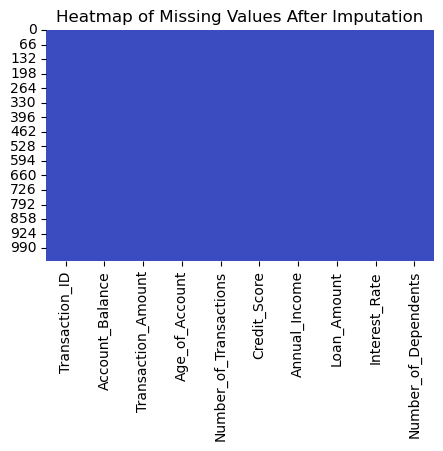

In [95]:
# Visualizing Missing Values after Imputation
plt.figure(figsize=(5, 3))
sns.heatmap(df_imputed.isnull(), cbar=False, cmap='coolwarm')
plt.title('Heatmap of Missing Values After Imputation')
plt.show()

In [96]:
# Identifying and Displaying Duplicates
duplicates = df[df.duplicated()]
print(f"\nNumber of duplicate rows: {duplicates.shape[0]}")
print("Duplicate Rows:")
print(duplicates.head())


Number of duplicate rows: 45
Duplicate Rows:
      Transaction_ID  Account_Balance  Transaction_Amount  Age_of_Account  \
1000           873.0      2241.361544          184.598286        0.825946   
1001           547.0      6154.144254          150.080728        2.244765   
1002           255.0      1961.260068          261.383450        2.495213   
1003           876.0      8589.115727          269.784191        3.180633   
1004           745.0      6035.318041                 NaN       -0.059120   

      Number_of_Transactions  Credit_Score  Annual_Income   Loan_Amount  \
1000                     8.0    748.785669            NaN  22986.986466   
1001                    12.0    738.025306   45325.380753  19726.558856   
1002                    14.0    708.378505   39693.679879  12485.656232   
1003                     6.0    592.313471   77460.902289  12446.957504   
1004                    11.0    625.324511   88066.117235  18290.715180   

      Interest_Rate  Number_of_Dependent

In [97]:
# Dropping Duplicates
df_imputed.drop_duplicates(inplace=True)
print("Duplicate rows removed.\n")

Duplicate rows removed.



In [98]:
# Function to detect and cap outliers using IQR
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

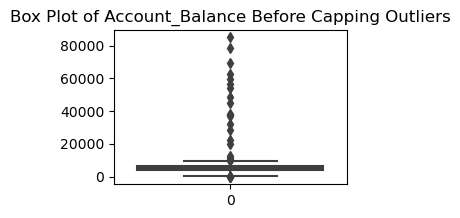

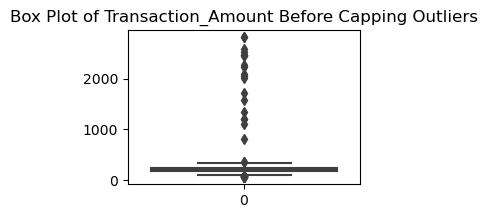

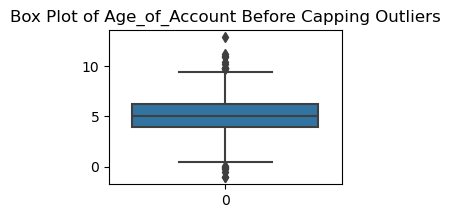

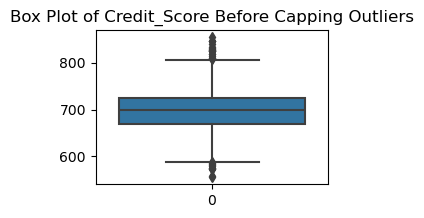

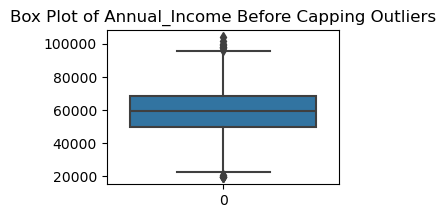

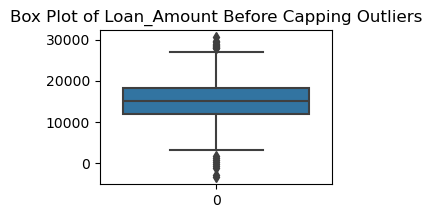

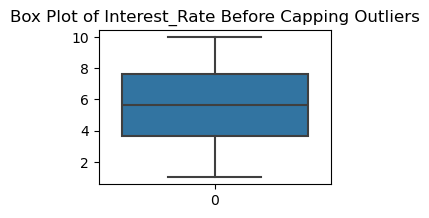

In [130]:
# Outlier Detection, Capping, and Visualization
columns_with_outliers = ['Account_Balance', 'Transaction_Amount', 'Age_of_Account', 'Credit_Score', 'Annual_Income', 'Loan_Amount', 'Interest_Rate']

for column in columns_with_outliers:
    plt.figure(figsize=(3, 2))
    sns.boxplot(df_imputed[column])
    plt.title(f'Box Plot of {column} Before Capping Outliers')
    plt.show()

In [106]:
    cap_outliers(df_imputed, column)
    print(f"Outliers in '{column}' have been capped.\n")

Outliers in 'Interest_Rate' have been capped.



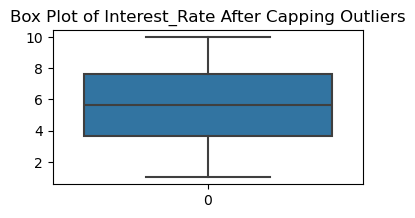

In [107]:
    plt.figure(figsize=(4, 2))
    sns.boxplot(df_imputed[column])
    plt.title(f'Box Plot of {column} After Capping Outliers')
    plt.show()

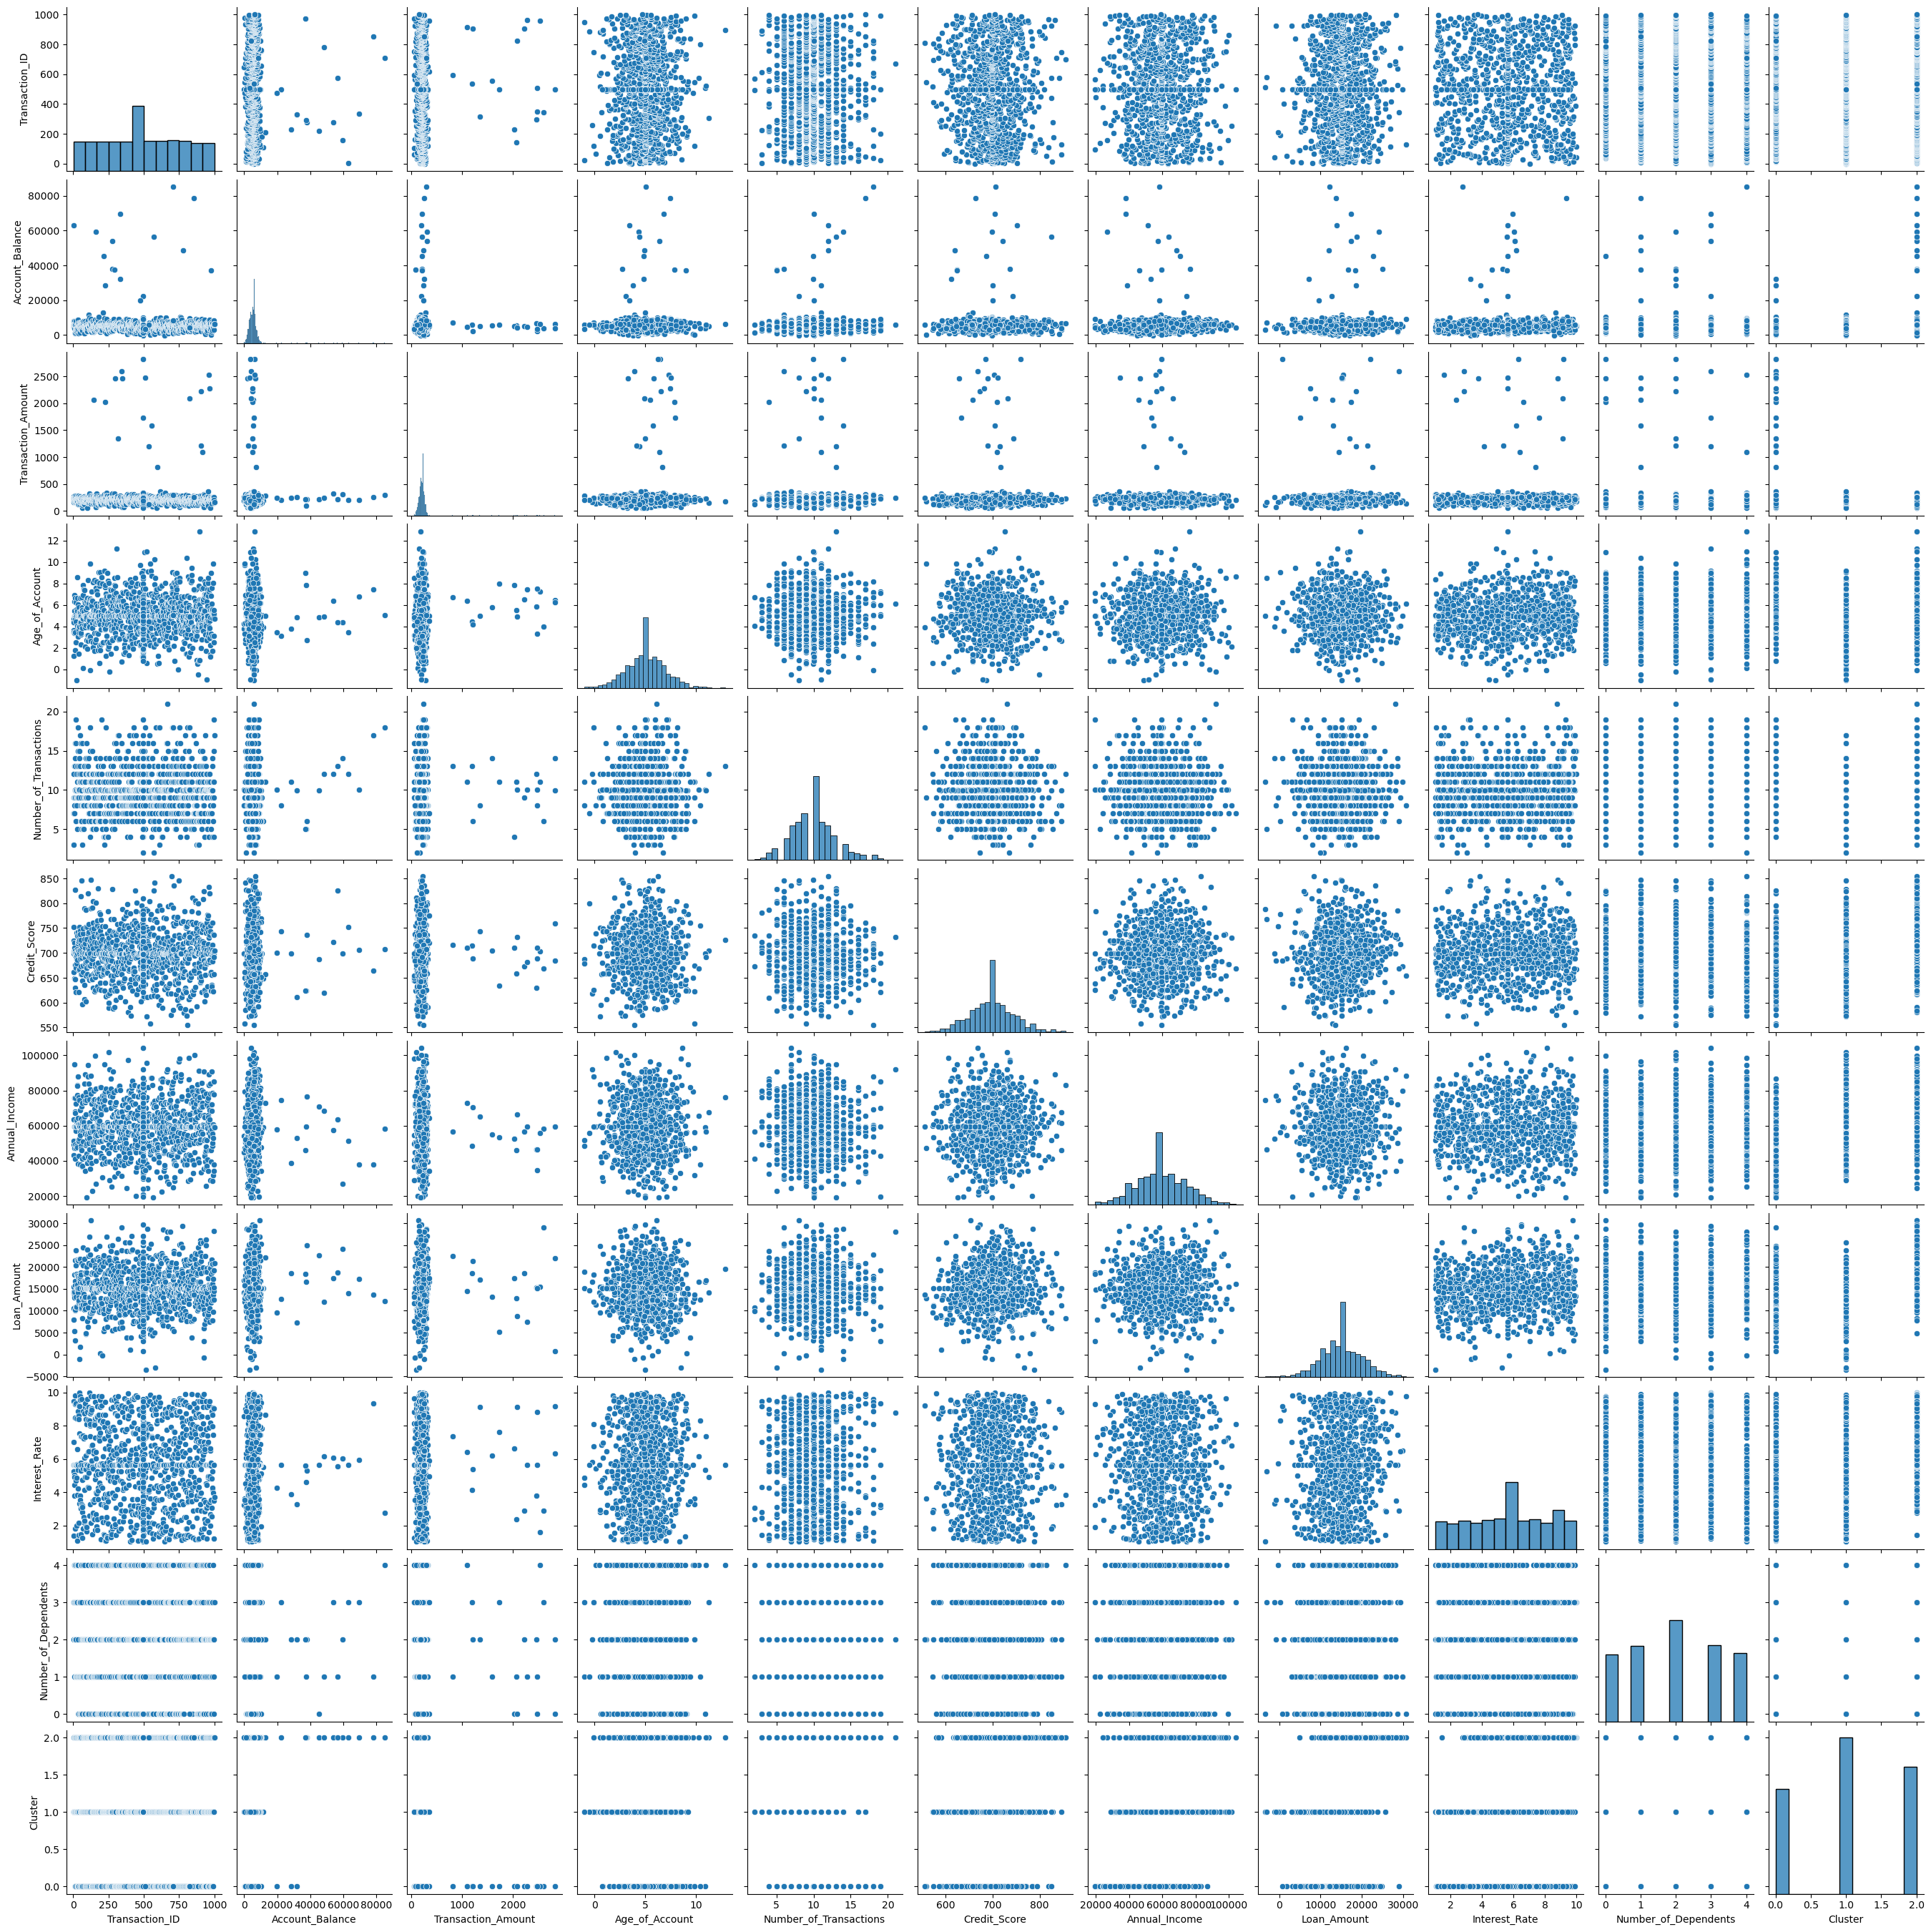

In [115]:
# Exploratory Data Analysis (EDA)
# Pairplot
sns.pairplot(df_imputed)
plt.show()

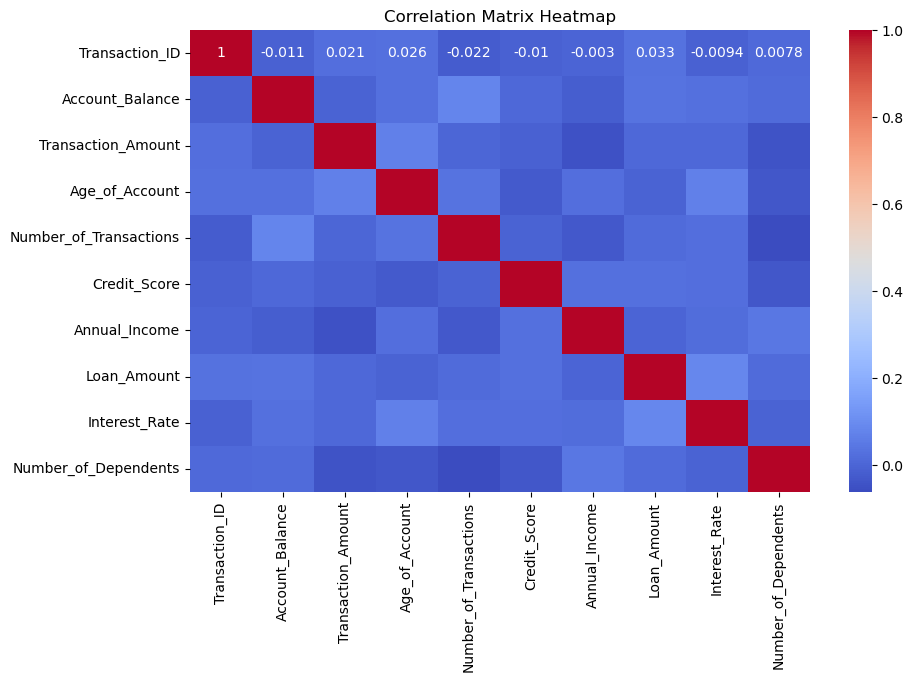

In [102]:
# Correlation Matrix and Heatmap
correlation_matrix = df_imputed.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

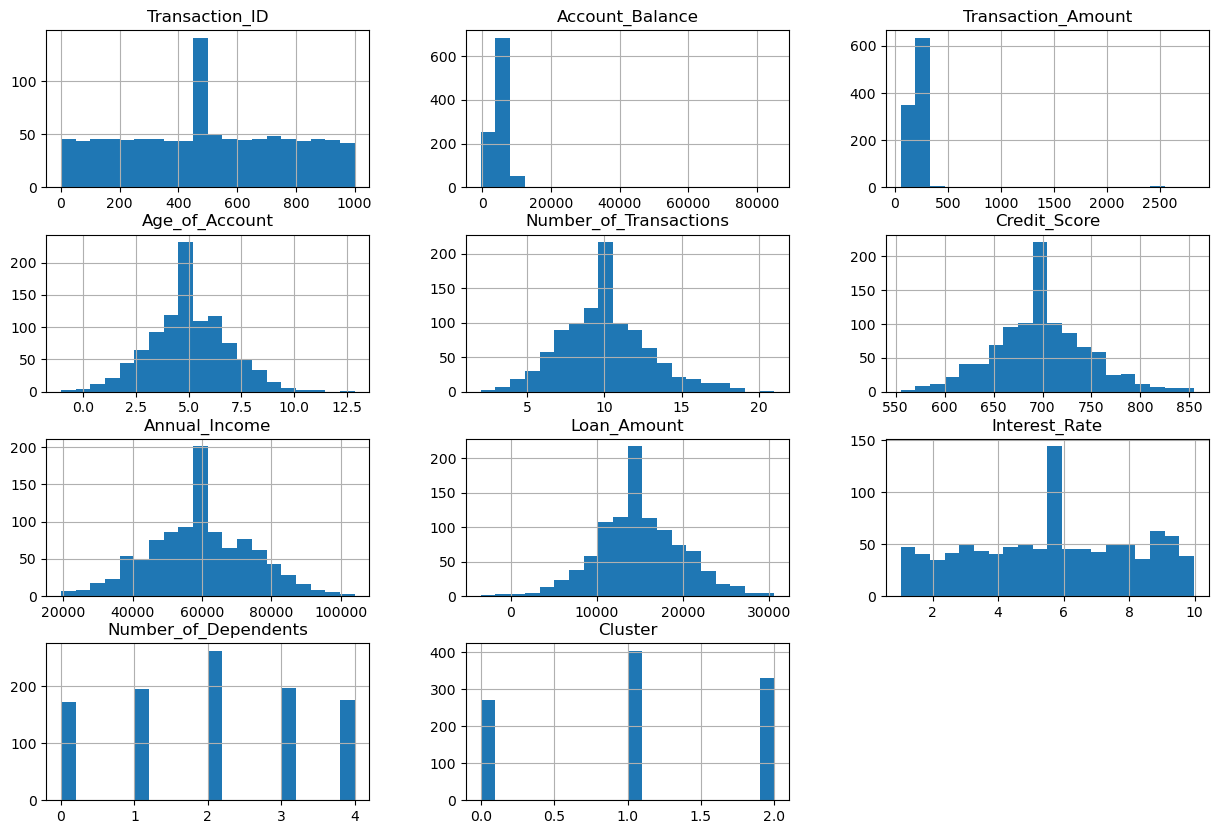

In [139]:
# Distribution of Features
df_imputed.hist(bins=20, figsize=(15, 10))
plt.show()

In [108]:
# K-Means Clustering
# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

In [109]:
# Apply PCA for dimensionality reduction 
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

In [116]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_pca)

In [111]:
# Add cluster labels to the DataFrame
df_imputed['Cluster'] = clusters

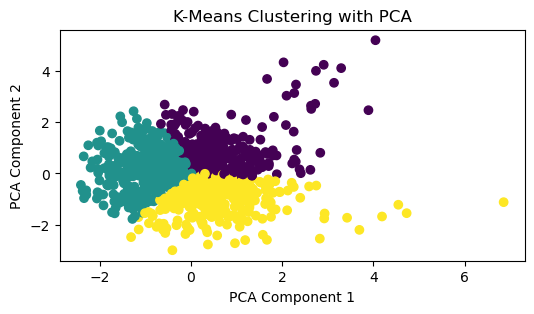

In [133]:
# Visualize the Clusters
plt.figure(figsize=(6, 3))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering with PCA')
plt.show()

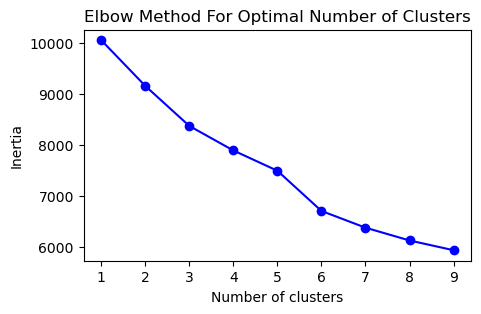

In [117]:
# Elbow Method
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(5, 3))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

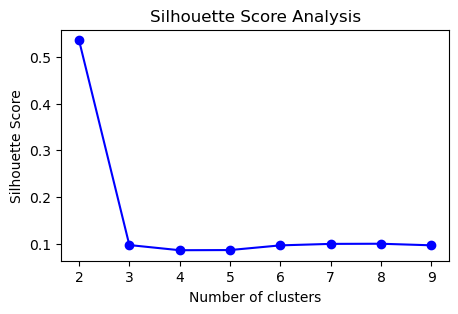

In [132]:
from sklearn.metrics import silhouette_score

# Silhouette Score Analysis
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(5, 3))
plt.plot(range(2, 10), silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.show()

In [119]:
# Model Deployment (Example: Saving the Model and Data Pipeline)
# Create a pipeline for the preprocessing and clustering
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])

In [120]:
# Fit the pipeline to the data
pipeline.fit(df_imputed.drop(columns=['Cluster']))

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('kmeans', KMeans(n_clusters=3, random_state=42))])

In [121]:
# Save the pipeline to a file
joblib.dump(pipeline, 'financial_pipeline.pkl')
print("Model pipeline saved to 'financial_pipeline.pkl'")

Model pipeline saved to 'financial_pipeline.pkl'


In [122]:
# Load the pipeline (for deployment)
# loaded_pipeline = joblib.load('financial_pipeline.pkl')
# predictions = loaded_pipeline.predict(new_data)

print("ML Model, EDA, and Deployment steps are complete.")

ML Model, EDA, and Deployment steps are complete.


In [126]:
pipeline = joblib.load('financial_pipeline.pkl')
print(pipeline)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('kmeans', KMeans(n_clusters=3, random_state=42))])
